In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import os

In [5]:
'''
Read the log file as pandas dataframe

Use generation as index and skip the latter parameter rows 
and eliminate white space from columns
'''
def parse_log_file(file_path):
    df = pd.read_csv(file_path, sep='\t', index_col='gen', skiprows=lambda x: x > 31)
    df.columns = df.columns.str.replace(' ', '')
    return df

In [6]:
PATH_PREFIX = 'C:/Users/Kasper/PycharmProjects/EC/evoman_framework/specialist_A1_fixed/'
#PATH_PREFIX = 'evoman_framework/specialist_A1_fixed/'
file_name = 'life_test01-10-2019_01-42-38_enemy_1.txt'

df = parse_log_file(PATH_PREFIX + file_name)
df

,nevals,life_avg,avg,std,min,max
gen,,,,,,
0,100,0.000000,-1.04265,1.096090e+01,-6.32972,57.1623
1,153,0.000000,5.49654,1.513530e+01,-5.83773,57.2317
2,133,0.000000,13.92520,1.903040e+01,-5.27300,66.7530
3,146,0.000000,27.42040,2.053590e+01,-5.25227,75.3232
4,146,0.000000,42.43240,1.977140e+01,3.30291,75.3232
5,141,0.000000,53.10950,1.364220e+01,12.79050,75.3232
6,147,0.000000,59.05230,6.565250e+00,21.75300,75.3232
7,140,0.000000,60.56090,5.991460e+00,57.16230,75.7477
8,146,0.191781,63.93030,6.888900e+00,57.16230,75.7477


In [7]:
PATH_PREFIX = 'evoman_framework/specialist_A1_fixed/'
files = os.listdir(PATH_PREFIX)
file_names_a1 = [file for file in files if 'life_test' in file]

PATH_PREFIX = 'evoman_framework/specialist_A2_fixed/'
files = os.listdir(PATH_PREFIX)
file_names_a2 = [file for file in files if 'life_test' in file]

In [8]:
file_names_a1_e1 = [file for file in file_names_a1 if 'enemy_1' in file]
file_names_a1_e2 = [file for file in file_names_a1 if 'enemy_2' in file]
file_names_a1_e3 = [file for file in file_names_a1 if 'enemy_3' in file]

file_names_a2_e1 = [file for file in file_names_a2 if 'enemy_1' in file]
file_names_a2_e2 = [file for file in file_names_a2 if 'enemy_2' in file]
file_names_a2_e3 = [file for file in file_names_a2 if 'enemy_3' in file]

files_enemies_map = {
    'files_a1_e1': file_names_a1_e1,
    'files_a1_e2': file_names_a1_e2,
    'files_a1_e3': file_names_a1_e3,

    'files_a2_e1': file_names_a2_e1,
    'files_a2_e2': file_names_a2_e2,
    'files_a2_e3': file_names_a2_e3
}

In [9]:
grouped_row_enemy_map = {
    'grouped_row_a1_e1': None,
    'grouped_row_a1_e2': None,
    'grouped_row_a1_e3': None,
    
    'grouped_row_a2_e1': None,
    'grouped_row_a2_e2': None,
    'grouped_row_a2_e3': None,
}

for i in range(1, 3):
    PATH_PREFIX = 'evoman_framework/specialist_A' + str(i) + '_fixed/'
    for j in range(1, 4):
        df_concat = None
        # Concatenate all the results in one big dataframe (for one enemy)
        for f in files_enemies_map['files_a' + str(i) + '_e' + str(j)]:
            df = parse_log_file(PATH_PREFIX + f)
            if df_concat is None:
                df_concat = df
                continue
            df_concat = pd.concat((df_concat, df))
        # Group them by row so we can keep the structure and do statistical analysis
        grouped_row_index = df_concat.groupby(df_concat.index)
        grouped_row_enemy_map['grouped_row_a' + str(i) + '_e' + str(j)] = grouped_row_index

Averaged mean over specified runs (independent experiments)

and

Averaged std over specified runs (independent experiments)

In [10]:
means_enemies_map = {
    'df_means_a1_e1': None,
    'df_means_a1_e2': None,
    'df_means_a1_e3': None,

    'df_means_a2_e1': None,
    'df_means_a2_e2': None,
    'df_means_a2_e3': None
}

std_enemies_map = {
    'df_std_a1_e1': None,
    'df_std_a1_e2': None,
    'df_std_a1_e3': None,

    'df_std_a2_e1': None,
    'df_std_a2_e2': None,
    'df_std_a2_e3': None
}

for i in range(1, 3):
    for j in range(1, 4):
        means_enemies_map['df_means_a' + str(i) + '_e' + str(j)] = grouped_row_enemy_map['grouped_row_a' + str(i) + '_e' + str(j)].mean()
        std_enemies_map['df_std_a' + str(i) + '_e' + str(j)] = grouped_row_enemy_map['grouped_row_a' + str(i) + '_e' + str(j)].std()

#### For each Task/algorithm, plot the average/standard deviation of the fitness and energy points (life) of the agents across the generations using a line-plot. Note that you need to calculate the average (over the 10 runs) of the average (over the populations).

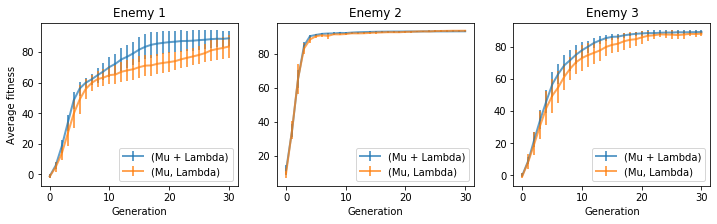

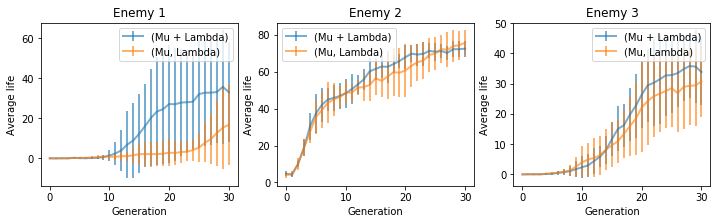

In [47]:
# Average fitness + std

x = list(range(0, 31))

fig = plt.figure(figsize=(12, 3))
for i in range(1, 4):
    plt.subplot(1, 3, i)
    plt.errorbar(x, means_enemies_map['df_means_a1_e' + str(i)]['avg'], yerr=std_enemies_map['df_std_a1_e' + str(i)]['avg'], label="(Mu + Lambda)", alpha=0.7, lw=2)
    plt.errorbar(x, means_enemies_map['df_means_a2_e' + str(i)]['avg'], yerr=std_enemies_map['df_std_a2_e' + str(i)]['avg'], label="(Mu, Lambda)",alpha=0.7, lw=2)
    if i == 1:
        plt.ylabel('Average fitness')
    plt.xlabel('Generation')
    plt.legend()
    plt.title('Enemy ' + str(i))

plt.savefig('avg-fitness.pdf', bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(12, 3))
for i in range(1, 4):
    plt.subplot(1, 3, i)
    # Average life + std
    plt.errorbar(x, means_enemies_map['df_means_a1_e' + str(i)]['life_avg'], yerr=std_enemies_map['df_std_a1_e' + str(i)]['life_avg'], label="(Mu + Lambda)",alpha=0.6, lw=2)
    plt.errorbar(x, means_enemies_map['df_means_a2_e' + str(i)]['life_avg'], yerr=std_enemies_map['df_std_a2_e' + str(i)]['life_avg'], label="(Mu, Lambda)",alpha=0.6, lw=2)
    plt.ylabel('Average life')
    plt.xlabel('Generation')
    plt.legend()
    plt.title('Enemy ' + str(i))

plt.savefig('avg-life.pdf', bbox_inches='tight')
plt.show()

#### For each Task/algorithm/enemy, test your final best solution for each of the 10 independent runs, and present this result in a box-plot. Additionally, do a statistical test to verify if the differences in average are significant.

In [12]:
best_fitnesses = {
    'best_fitness_a1_e1': [],
    'best_fitness_a1_e2': [],
    'best_fitness_a1_e3': [],

    'best_fitness_a2_e1': [],
    'best_fitness_a2_e2': [],
    'best_fitness_a2_e3': []
}

for i in range(1, 3):
    PATH_PREFIX = 'evoman_framework/specialist_A' + str(i) + '_fixed/'
    for j in range(1, 4):
        for f in files_enemies_map['files_a' + str(i) + '_e' + str(j)]:
            df = parse_log_file(PATH_PREFIX + f)
            best_fitnesses['best_fitness_a' + str(i) + '_e' + str(j)].append(max(df['max']))

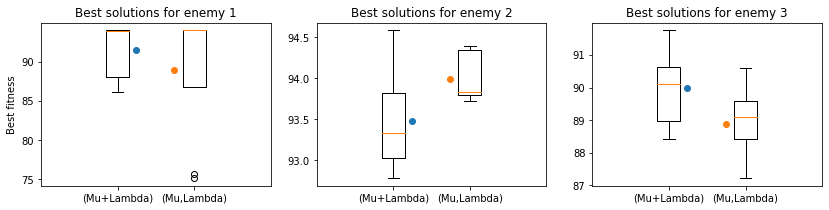

In [19]:
fig = plt.figure(figsize=(14, 3))
for i in range(1, 4):
    plt.subplot(1, 3, i)
    
    best_f_list_a1 = best_fitnesses['best_fitness_a1_e' + str(i)]
    best_f_list_a2 = best_fitnesses['best_fitness_a2_e' + str(i)]
    # Boxplot of x-run averages of average population fitness
    plt.boxplot([best_f_list_a1, best_f_list_a2], positions = [1, 1.5])
    # Plot arithmetic mean
    plt.scatter(1.12, np.mean(best_f_list_a1))
    plt.scatter(1.37, np.mean(best_f_list_a2))
    # Hide x-axis ticks
    plt.xticks([1, 1.5], ['(Mu+Lambda)', '(Mu,Lambda)'])
    if i == 2:
        plt.yticks([93,93.5,94,94.5])
    if i == 1:
        plt.ylabel('Best fitness')
    
    plt.title('Best solutions for enemy ' + str(i))

plt.savefig('bestsol-bestfit.pdf', bbox_inches='tight')
plt.show()

## Statistical T-Test

Null hypothesis: The means are the same

Alternate hypothesis: they are different

In [14]:
alpha = 0.05

for e in range(1, 4):
    fitnesses_a1 = best_fitnesses['best_fitness_a1_e' + str(e)]
    fitnesses_a2 = best_fitnesses['best_fitness_a2_e' + str(e)]
    t, p = stats.ttest_ind(fitnesses_a1, fitnesses_a2)
    print('T value for enemy ' + str(e) + ': ' + str(t))
    print('p value for enemy ' + str(e) + ': ' + str(p) + '\n')
    if p < alpha:
        print('The difference between algorithm 1 and algorithm 2 for enemy ' + str(e) + ' IS significantly different!\n\n')
    else:
        print('The difference between algorithm 1 and algorithm 2 for enemy ' + str(e) + ' is NOT significantly different!\n\n')

T value for enemy 1: 0.9223804656056145
p value for enemy 1: 0.3692364990928565

The difference between algorithm 1 and algorithm 2 for enemy 1 is NOT significantly different!


T value for enemy 2: -2.291974729879956
p value for enemy 2: 0.03494204883420799

The difference between algorithm 1 and algorithm 2 for enemy 2 IS significantly different!


T value for enemy 3: 2.088404551737855
p value for enemy 3: 0.052115382153298584

The difference between algorithm 1 and algorithm 2 for enemy 3 is NOT significantly different!


